# Optimizing agricultural production

In [278]:
# for manupulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

In [279]:
# Let's read the DataSet
data = pd.read_csv("B:\\3d\\Database\\data.csv")

In [280]:
# checking the shape of the data
data.shape

(2200, 8)

In [281]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [282]:
data.isnull().sum() # checking the number of null values present in the dataSet

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [283]:
 # checking the crop(Unique values) values in the DataSet
data["label"].value_counts()

pigeonpeas     100
lentil         100
coffee         100
grapes         100
apple          100
jute           100
blackgram      100
coconut        100
kidneybeans    100
cotton         100
chickpea       100
papaya         100
maize          100
rice           100
watermelon     100
pomegranate    100
muskmelon      100
mungbean       100
orange         100
mothbeans      100
mango          100
banana         100
Name: label, dtype: int64

In [284]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [285]:
# summary of all of the crops

print("Average Ratio of Nitrogen in the soil : {0:.2f}".format(data["N"].mean()))
print("Average Ratio of Phosporus in the soil : {0:.2f}".format(data["P"].mean()))
print("Average Ratio of pottasium in the soil : {0:.2f}".format(data["K"].mean()))
print("Average Temperature in celsius : {0:.2f}".format(data["temperature"].mean()))
print("Average Relative humidity : {0:.2f}".format(data["humidity"].mean()))
print("Average PH value of soil : {0:.2f}".format(data["ph"].mean()))
print("Average rainfall in mm : {0:.2f}".format(data["rainfall"].mean()))


Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosporus in the soil : 53.36
Average Ratio of pottasium in the soil : 48.15
Average Temperature in celsius : 25.62
Average Relative humidity : 71.48
Average PH value of soil : 6.47
Average rainfall in mm : 103.46


In [286]:
@interact
def summary(crops = list(data["label"].value_counts().index)):
    x = data[data["label"] == crops] 
    for i in data.columns:
        print("--------------------------------------")
        print("Stastical data of : {}".format(data[i].name))
        print("Maximum {} required  ({})".format(data[i].name, x[i].max()))
        print("Minimum {} required : ({})".format(data[i].name, x[i].min()))
        print("Average {} required : ({})".format(data[i].name, x[i].mean()))
       


interactive(children=(Dropdown(description='crops', options=('pigeonpeas', 'lentil', 'coffee', 'grapes', 'appl…

In [287]:
# let's compare the Average requirements for each crops with average conditions

@interact
def compare(conditions = ["N", "P", "K", "temperature","ph", "humidity","rainfall" ]):
    print("Average value for", conditions, "is {0:.2f}".format(data[conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [288]:
# lets make this function more intutive

@interact
def compare(conditions = ["N", "P", "K", "temperature","ph", "humidity","rainfall" ]):
    print("Crops which require greater than average ", conditions ,"\n")
    print(data[data[conditions] > data[conditions].mean()]["label"].unique())
    print("----------------------------------------")
    print("crops which requires less than average", conditions, "\n")
    print(data[data[conditions] <= data[conditions].mean()]["label"].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

LOL xd


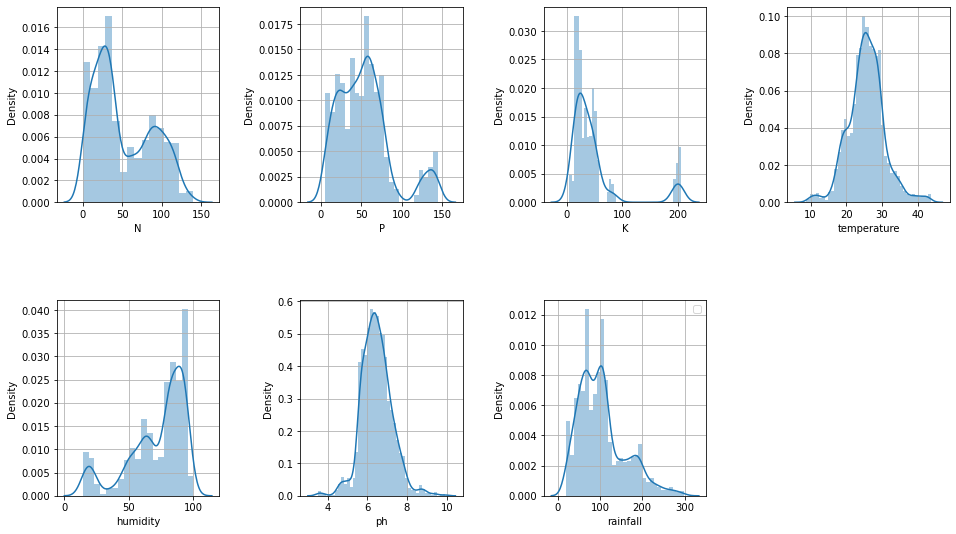

In [289]:
plt.figure(figsize = (16,9))
for i in data.columns:
    if data[i].dtype != object:
        plt.subplot(2,4,data.columns.get_loc(i)+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.distplot(data[i])
        plt.xlabel(data[i].name)
        plt.grid()
    else:
        print("LOL xd")
plt.legend()

In [290]:
data.columns.get_loc("label")

import sys
import numpy as np

In [291]:
np.set_printoptions(threshold=sys.maxsize)
# let's find out some facts about the data
for i in data.columns:
    if data[i].dtype != object :
        print("------------------------------------")
        name = data[i].name
        print("crops require high value of {} ""\n"" {} ".format(name, data[data[i] > data[i].mean()]["label"].unique()))
        print("crops require less value of {} ""\n"" {} ".format(name, data[data[i] < data[i].mean()]["label"].unique()))  
    

------------------------------------
crops require high value of N 
 ['rice' 'maize' 'chickpea' 'blackgram' 'banana' 'watermelon' 'muskmelon'
 'papaya' 'cotton' 'jute' 'coffee'] 
crops require less value of N 
 ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'papaya'
 'coconut'] 
------------------------------------
crops require high value of P 
 ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'banana' 'grapes' 'apple' 'papaya'
 'cotton' 'jute'] 
crops require less value of P 
 ['rice' 'maize' 'mothbeans' 'mungbean' 'pomegranate' 'mango' 'watermelon'
 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee'] 
------------------------------------
crops require high value of K 
 ['chickpea' 'banana' 'grapes' 'watermelon' 'muskmelon' 'apple' 'papaya'] 
crops require less value of K 
 ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean

In [292]:
## Lets understand which crops can be grown , season wise
print("Summer crops")
print(data[(data["temperature"] > 30) & (data["humidity"] > 50)]["label"].unique())
print("--------------------------------")
print("winter crops")
print(data[(data["temperature"] < 20) & (data["humidity"] > 30)]["label"].unique())
print("-------------------------------")
print("Rainy crops")
print(data[(data["rainfall"] > 200) & (data["humidity"] > 30 )]["label"].unique())

Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--------------------------------
winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------
Rainy crops
['rice' 'papaya' 'coconut']


In [293]:
from sklearn.cluster import KMeans
df = data.drop(["label"], axis = 1) # removing the object column
df.values # selecting all the values of the data
df.shape # checking the shape


(2200, 7)

No handles with labels found to put in legend.


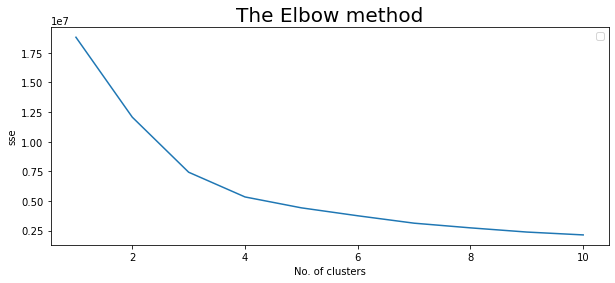

In [294]:
# let's determine the optimum numbers of clusters within the dataset

plt.figure(figsize = (10,4))
sse = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)
    
# plot the results
plt.plot(range(1,11), wcss)
plt.title("The Elbow method", fontsize = 20)
plt.xlabel("No. of clusters")
plt.ylabel("sse")
plt.legend()
plt.show()

In [295]:
# Let's imlement the K means algo to perform clustering analysis
km = KMeans(n_clusters = 4,init = "k-means++" , max_iter=300, n_init = 10, random_state = 0)
y_means = km.fit_predict(df)

# let's find out the results
a =  data["label"]
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0:"cluster"})
z

,cluster,label
0,3,rice
1,3,rice
2,3,rice
3,3,rice
4,3,rice
...,...,...
2195,3,coffee
2196,1,coffee
2197,3,coffee
2198,1,coffee


In [296]:
# let's check the clusters of each crops
print("crops in first cluster :", z[z["cluster"] == 0]["label"].unique())
print("--------------------------------------")
print("crops in second cluster :", z[z["cluster"] == 1]["label"].unique())
print("--------------------------------------")
print("crops in third cluster :", z[z["cluster"] == 2]["label"].unique())
print("--------------------------------------")
print("crops in fourth cluster :", z[z["cluster"] == 3]["label"].unique())

crops in first cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------
crops in second cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------
crops in third cluster : ['grapes' 'apple']
--------------------------------------
crops in fourth cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [297]:
# let's split the datasets for predictive modelling

y = data["label"]
x = data.drop(["label"], axis = 1)
print("x shape :", x.shape)
print("y shape :", y.shape)

x shape : (2200, 7)
y shape : (2200,)


In [298]:
# Let's create the Training and Test sets for validation of results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=0)


In [299]:
# Let's create a predictive modelling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train )
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


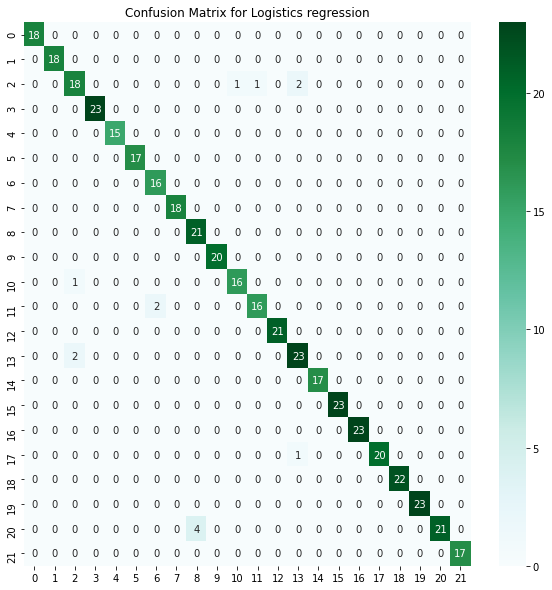

In [300]:
# Let's evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# let's print the confusion matrix first
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "BuGn")
plt.title("Confusion Matrix for Logistics regression")
plt.show()

In [303]:
from sklearn.metrics import classification_report

In [304]:
# let's print the Classification Report too
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [310]:
model.score(X_test, y_test)

0.9681818181818181

In [311]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [312]:
prediction = model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The suggested crop for given Cliamatic condiiton is :", prediction)

The suggested crop for given Cliamatic condiiton is : ['rice']
